In [ ]:
from models.preferences.preference_utils import (
    get_child_data,
    initialize_child_preference_data,
    print_preference_difference_and_accuracy,
    calculate_percent_of_known_ingredients_to_unknown,
    plot_individual_child_known_percent,
    plot_preference_and_sentiment_accuracies,
    plot_utilities_and_mape,
    plot_utilities_from_json,
)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def plot_ingredient_data_histograms(ingredient_df, rotation=15, fontsize=12):
    # Convert child_data to a DataFrame
    df = pd.DataFrame(ingredient_df)

    # Plotting histograms for each feature
    features = ['Colour', 'Taste', 'Texture', 'Healthy']

    fig, axes = plt.subplots(2, 2, figsize=(12, 4))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if df[feature].dtype == 'object':
            # For categorical data
            df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_ylabel('Count', fontsize=fontsize)
            # Format the x-tick labels
            formatted_labels = [label.replace('_', ' ').title() if isinstance(label, str) else label for label in df[feature].value_counts().index]
            axes[idx].set_xticklabels(formatted_labels, rotation=rotation, fontsize=fontsize)
        else:
            # For numerical data
            df[feature].plot(kind='hist', ax=axes[idx], bins=range(8, 13), color='skyblue')
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_xticks(range(8, 13))
            axes[idx].tick_params(axis='x', labelsize=fontsize)

        # Capitalize and remove underscores in the feature name for xlabel
        formatted_feature = feature.replace('_', ' ').title()
        axes[idx].set_xlabel(formatted_feature, fontsize=fontsize)

    plt.tight_layout()
    plt.show()

    # Count the number of 1s in specified groups
    groups = ['Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E', 'Bread', 'Confectionary']
    
    group_rename = {
        'Group A veg': 'Vegetables',
        'Group A fruit': 'Fruits',
        'Group BC': 'Protein',
        'Group D': 'Carbs',
        'Group E': 'Dairy',
        'Bread': 'Bread',
        'Confectionary': 'Confectionary'
    }
    
    counts = {group: df[group].sum() for group in groups}

    # Calculate the number of ingredients not in any group
    total_ingredients = len(df)
    ingredients_in_groups = sum(counts.values())
    ingredients_not_in_any_group = total_ingredients - ingredients_in_groups

    # Rename the groups for the plot and add the "None" category
    renamed_counts = {group_rename[group]: count for group, count in counts.items()}
    renamed_counts['Misc'] = ingredients_not_in_any_group

    # Plot the counts on a bar chart
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(renamed_counts.keys(), renamed_counts.values(), color='skyblue')
    ax.set_xlabel('Groups', fontsize=fontsize)
    ax.set_ylabel('Number of Ingredients in Group', fontsize=fontsize)
    plt.xticks(rotation=15, fontsize=fontsize)
    plt.tight_layout()
    plt.show()

# Assuming the function get_data returns the appropriate DataFrame
from utils.process_data import get_data
ingredient_df = get_data("data.csv")

plot_ingredient_data_histograms(ingredient_df)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def plot_child_data_histograms(child_data, rotation=0, fontsize=12):
    # Convert child_data to a DataFrame
    df = pd.DataFrame(child_data).T

    # Plotting histograms for each feature
    features = ['age', 'gender', 'health_consideration', 'favorite_cuisine']

    fig, axes = plt.subplots(2, 2, figsize=(12, 4))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if df[feature].dtype == 'object':
            # For categorical data
            df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_ylabel('Count', fontsize=fontsize)
            # Format the x-tick labels
            formatted_labels = [label.replace('_', ' ').title() if isinstance(label, str) else label for label in df[feature].value_counts().index]
            axes[idx].set_xticklabels(formatted_labels, rotation=rotation, fontsize=fontsize)
        else:
            # For numerical data
            df[feature].plot(kind='hist', ax=axes[idx], bins=range(8, 13), color='skyblue')
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_xticks(range(8, 13))
            axes[idx].tick_params(axis='x', labelsize=fontsize)

        # Capitalize and remove underscores in the feature name for xlabel
        formatted_feature = feature.replace('_', ' ').title()
        # axes[idx].set_title(f'Histogram of {formatted_feature}', fontsize=fontsize)
        axes[idx].set_xlabel(formatted_feature, fontsize=fontsize)

    plt.tight_layout()
    plt.show()
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

    
child_data = get_child_data()
plot_child_data_histograms(child_data)


In [ ]:
ingredient_df = get_data("data.csv")
child_data = get_child_data()
data = initialize_child_preference_data(child_data=child_data, ingredient_df=ingredient_df, plot_graphs=True, child_key_plot='c2hild23')

In [ ]:
from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generators import RandomMenuGenerator
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.preference_utils import (get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy, calculate_percent_of_known_ingredients_to_unknown, plot_individual_child_known_percent, plot_preference_and_sentiment_accuracies, plot_utilities_and_mape, plot_utilities_from_json)
from utils.process_data import get_data

child_data = get_child_data()
ingredient_df = get_data("data.csv")
true_child_preference_data = initialize_child_preference_data(child_data, ingredient_df, seed=None, plot_graphs=False, split = 0.5)

# Set to zero for complete randomness
probability_best = 0
# Random is all equal and score is based on the score of the ingredient in terms of the negotiated list
weight_type = "random"
# weight_type = "score"
menu_plan_length = 10
seed = None

# Complex weight function arguments
complex_weight_func_args = {
    'use_normalize_total_voting_weight': False,
    'use_normalize_vote_categories': True,
    'use_compensatory': True,
    'use_feedback': True,
    'use_fairness': True,
    'target_gini': 0.15,
}
weight_function = 'simple'



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Define a function to run the model and collect the data
def run_model_for_confusion_matrix(model_name_dict, iterations, ingredient_df, child_data, true_child_preference_data, seed):
    results = {}
    
    for model_name in model_name_dict.keys():
        if model_name == "perfect":
            continue  # Skip the 'perfect' model

        all_true_labels = []
        all_pred_labels = []

        for _ in range(iterations):
            # Initialize and run the preference model
            predictor = PreferenceModel(
                ingredient_df, child_data, true_child_preference_data, visualize_data=False, file_path=None, seed=seed
            )
            updated_known_and_predicted_preferences, total_true_preferences, total_predicted_preferences, label_encoder = predictor.run_pipeline()

            previous_feedback = {}
            previous_utility = {}

            # Initial negotiation of ingredients
            negotiator = IngredientNegotiator(
                seed, ingredient_df, updated_known_and_predicted_preferences, complex_weight_func_args, previous_feedback, previous_utility,
            )

            negotiated_ingredients_simple, negotiated_ingredients_complex, unavailable_ingredients = negotiator.negotiate_ingredients()

            # Calculate week and day
            week = 1
            day = 1

            # Save negotiation results
            negotiator.close("log_file.json", week=week, day=day)

            menu_generator = RandomMenuGenerator(menu_plan_length=1, weight_type='random', probability_best=probability_best, seed=None)

            # Generate menu based on negotiated list
            menu_plan = menu_generator.generate_menu(negotiated_ingredients_simple, unavailable_ingredients, save_paths={'data': '', 'graphs': ''}, week=week, day=day)

            # Sentiment analysis initiation, initially with true preference data and will adapt it to updated preferences from feedback
            sentiment_analyzer = SentimentAnalyzer(
                true_child_preference_data, menu_plan, model_name=model_name, seed=None
            )

            # Get updated preferences from feedback, the sentiment accuracy and feedback given
            updated_known_unknown_preferences_with_feedback, sentiment_accuracy, feedback_given, true_labels, pred_labels = sentiment_analyzer.get_sentiment_and_update_data(plot_confusion_matrix=False)

            # Remove None values from true_labels and corresponding pred_labels
            filtered_true_labels = []
            filtered_pred_labels = []

            for true_label, pred_label in zip(true_labels, pred_labels):
                if true_label is not None:  # Filter out None values
                    filtered_true_labels.append(true_label)
                    filtered_pred_labels.append(pred_label)

            # Collect filtered labels from this iteration
            all_true_labels.extend(filtered_true_labels)
            all_pred_labels.extend(filtered_pred_labels)

            # Assign the feedback given to the previous feedback for complex weight calculation
            previous_feedback = feedback_given

        # Calculate overall accuracy
        accuracy = accuracy_score(all_true_labels, all_pred_labels) * 100

        # Create a mapping from label names to indices based on the label encoder
        label_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}
        ordered_labels = ['dislikes', 'neutral', 'likes']
        encoded_labels = [label_mapping[label] for label in ordered_labels]

        # Generate the confusion matrix
        cm = confusion_matrix(all_true_labels, all_pred_labels, labels=ordered_labels)

        # Store results for plotting
        results[model_name] = {
            'cm': cm,
            'ordered_labels': ordered_labels,
            'accuracy': accuracy
        }

    return results

# Call the function to run the model and collect data
model_name_dict = {
    'roberta': "cardiffnlp/twitter-roberta-base-sentiment-latest",
    'bertweet': "finiteautomata/bertweet-base-sentiment-analysis",
    'distilroberta': "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
    '5_star': "nlptown/bert-base-multilingual-uncased-sentiment",
    'perfect': "perfect",  # Skip this one
    'TextBlob': "TextBlob",
    'Vader': "Vader"
}
iterations = 50  # Number of iterations for each model

# Assume ingredient_df, child_data, true_child_preference_data, seed, and other required variables are defined elsewhere
results = run_model_for_confusion_matrix(model_name_dict, iterations, ingredient_df, child_data, true_child_preference_data, seed)

# Now you have the results, which you can plot separately


In [ ]:
results

In [ ]:
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})
# Initialize the subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten to easily iterate over the axes

# Iterate over the results and plot
index = 0  # Index for subplots
for model_name, data in results.items():
    cm = data['cm']
    ordered_labels = data['ordered_labels']
    accuracy = data['accuracy']

    # Use the display_labels to match the order in 'ordered_labels'
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordered_labels)

    # Plot on the current subplot
    disp.plot(ax=axes[index], cmap=plt.cm.Blues, colorbar=False, xticks_rotation=0)
    axes[index].set_title(f'{model_name}, Accuracy: {accuracy:.1f}\%', fontsize=16)
    axes[index].set_xlabel('Predicted', fontsize=16)
    axes[index].set_ylabel('True', fontsize=16)
    axes[index].tick_params(axis='both', labelsize=14)
    
    # Increase font size for the text within the confusion matrix
    for text in disp.text_.ravel():
        text.set_fontsize(14)  # Set the desired font size here

    index += 1  # Move to the next subplot

# Adjust layout spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=-0.8)  # Adjust as needed

# Adjust layout
plt.tight_layout()
plt.show()


# Prediction

In [ ]:
from utils.process_data import get_data
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy
from models.preferences.prediction import PreferenceModel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer


name ='Random Forest'

        # models = {
        #     "Logistic Regression": LogisticRegression(solver='liblinear', C=1.0, max_iter=10000),
        #     "Support Vector Machine": SVC(C=1.0, kernel='rbf', probability=True),
        #     "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss'),
        #     "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, criterion='gini'),
        #     "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
        #     "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),
        #     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto'),
        #     "Decision Tree": DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None),
        #     "Gaussian Naive Bayes": GaussianNB(),
        #     "Stochastic Gradient Descent": SGDClassifier(loss='hinge', alpha=0.0001, max_iter=1000, tol=1e-3),
        #     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200)
        # }

child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")
initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split = 0.5, seed=None, plot_graphs=False)

predictor = PreferenceModel(
    ingredient_df, child_feature_data, initial_preference, model_name=name, visualize_data=True, file_path='preferences_visualization.png', seed=None
)
updated_preferences, true_labels, predicted_labels = predictor.run_pipeline()

accuracy = accuracy_score(true_labels, predicted_labels)

accuracy_total, std = print_preference_difference_and_accuracy(initial_preference, updated_preferences, summary_only=True)

print(accuracy)

print(accuracy_total)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from utils.process_data import get_data
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy
from models.preferences.prediction import PreferenceModel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

import os
from utils.process_data import get_data
from models.preferences.preference_utils import print_preference_difference_and_accuracy
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', C=10, max_iter=10000, class_weight='balanced'),
    "Support Vector Machine": SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', eval_metric='mlogloss', scale_pos_weight=1),  # XGBoost uses scale_pos_weight for class balancing
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, criterion='gini', class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),  # No direct class_weight support
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),  # No direct class_weight support
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto'),  # No direct class_weight support
    "Decision Tree": DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, class_weight='balanced'),
    "Gaussian Naive Bayes": GaussianNB(),  # No direct class_weight support
    "Stochastic Gradient Descent": SGDClassifier(loss='hinge', alpha=0.0001, max_iter=2000, tol=1e-3, class_weight='balanced'),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=2000)  # No direct class_weight support
}

# Define scorers with `average='macro'` set only for the appropriate metrics
scorers = {
'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
'accuracy': make_scorer(accuracy_score)  # No `average` parameter here
}

child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")

# Initial prediction of preferences
file_path = os.path.join('', "preferences_visualization.png")



# Assuming all imports and other necessary function definitions have been done as in the provided code.
import random
def evaluate_models():
    # Evaluate models using cross-validation
    results = []
    
    for iter in range(1):
        for split in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
            initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split = split, seed=random.randint(0, 1e36), plot_graphs=False)
            for name, model in models.items():
                predictor = PreferenceModel(
                    ingredient_df, child_feature_data, initial_preference, model_name=name, visualize_data=False, file_path=file_path, seed=None
                )
                updated_preferences, true_labels, predicted_labels, label_encoder = predictor.run_pipeline()
                accuracy_total, std = print_preference_difference_and_accuracy(initial_preference, updated_preferences, summary_only=True)
                del updated_preferences
                # Calculate accuracy
                accuracy = accuracy_score(true_labels, predicted_labels)

                # Print the model, accuracy, and iteration
                print(f"Iteration: {iter + 1}, Model: {name}, Accuracy: {accuracy:.4f}, Total Accuracy: {accuracy_total:.4f}")

                # Loop over each scorer
                for scorer_name, scorer in scorers.items():
                    # Calculate the score using the scorer
                    if scorer_name in ['precision_macro', 'recall_macro', 'f1_macro']:
                        score = scorer._score_func(true_labels, predicted_labels, average='macro')
                    else:
                        score = scorer._score_func(true_labels, predicted_labels)
                    
                    results.append({
                        "Iteration": iter,
                        "Split": split,
                        "Model": name,
                        "Metric": scorer_name,
                        "Score": score
                    })

    # Convert results to DataFrame for easy comparison
    results_df = pd.DataFrame(results)
    
    return results_df


def get_ranked_models(results_df):
    # Rank models for each metric
    ranked_results = results_df.copy()
    ranked_results['Rank'] = ranked_results.groupby('Metric')['Score'].rank(ascending=False, method='min')

    # Convert results to DataFrame for easy comparison
    results_df_sorted = ranked_results.sort_values(by=['Metric', 'Rank'])

    print(results_df_sorted)
    return results_df_sorted


# Example usage:

results_df = evaluate_models()
sorted_results_df = get_ranked_models(results_df)

    

In [ ]:
# Assuming `sorted_results_df` is your sorted DataFrame from the previous code
output_file_path = "sorted_results.csv"

# Save the DataFrame to a CSV file
sorted_results_df.to_csv(output_file_path, index=False)

print(f"Sorted results have been saved to {output_file_path}")


In [ ]:
grouped = sorted_results_df.groupby(['Model', 'Split', 'Metric']).agg({'Score': ['mean', 'std', 'count']}).reset_index()


# Sort by the mean score (descending) to find the best model
grouped_avg = grouped.sort_values(by=('Score', 'mean'), ascending=False)


# Display the top 10 models
top_10_models = grouped_avg.head(20)

# Display the results
print(top_10_models)


In [ ]:
import matplotlib.pyplot as plt

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})


print(grouped['Model'])
# Extract unique models
models = grouped['Model'].unique()
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']
colors = ['green', 'red', 'gray', 'magenta']

# Map models to colors
model_colors = {model: colors[i % len(colors)] for i, model in enumerate(models)}

# Plotting the data
plt.figure(figsize=(8, 5))
for model in models:
    filtered1 = grouped[grouped['Model'] == model]  # Filter data for the model
    model_data = filtered1[filtered1['Metric'] == 'accuracy']  # Filter data for the accuracy metric
    
    # Sort data by Split to ensure lines connect properly
    model_data = model_data.sort_values(by='Split')
    
    # Plotting lines between points
    plt.plot(model_data['Split'], model_data['Score']['mean'],
             color=model_colors[model],
             linestyle='-',  # Line style for connecting points
             label=model)
    
    # Plotting the scatter points with crosses
    plt.scatter(model_data['Split'], model_data['Score']['mean'],
                color=model_colors[model],
                marker='x')  # Cross marker for scatter points

# Adding labels and title with custom font size
plt.xlabel(r'Split Ratio', fontsize=14)
plt.ylabel(r'Accuracy', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

# Creating a legend outside the plot, on the right
plt.legend(title="Model Type", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=12)

plt.show()


In [ ]:
import pandas as pd
import optuna
import os
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from models.preferences.prediction import PreferenceModel
from models.preferences.preference_utils import print_preference_difference_and_accuracy
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data
from utils.process_data import get_data

# Define models with initial hyperparameters
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', C=1.0, max_iter=10000, class_weight='balanced'),
    "Support Vector Machine": SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss', scale_pos_weight=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, criterion='gini', class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
}

# Define scorers
scorers = {
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
    'accuracy': make_scorer(accuracy_score)
}

# Load and preprocess data
child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")
file_path = os.path.join('', "preferences_visualization.png")


def optimize_hyperparameters(model_name, ingredient_df, child_feature_data, initial_preference, n_trials=250):
    def objective(trial):
        # Re-initialize preferences for each trial
        initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.35, seed=None, plot_graphs=False)
        # Define the hyperparameter search space
        if model_name == "XGBoost":
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
                'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1.0, 3.0),
                'eval_metric': 'mlogloss',
                'use_label_encoder': False
            }
            model = XGBClassifier(**params)
        elif model_name == "Random Forest":
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 5, 30),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
                'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
                'class_weight': 'balanced'
            }
            model = RandomForestClassifier(**params)
        elif model_name == "Support Vector Machine":
            params = {
                'C': trial.suggest_loguniform('C', 1e-3, 1e2),
                'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e-1),
                'probability': True,
                'class_weight': 'balanced'
            }
            model = SVC(**params)
            
        elif model_name == "MLP Classifier":
            params = {
                'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 100)]),
                'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic']),
                'solver': trial.suggest_categorical('solver', ['adam', 'lbfgs']),
                'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-2),
                'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'adaptive']),
                'max_iter': 10000
            }
            model = MLPClassifier(**params)
            
        elif model_name == "Decision Tree":
            params = {
                'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
                'max_depth': trial.suggest_int('max_depth', 2, 20),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', [None, 'auto', 'sqrt', 'log2']),
                'class_weight': 'balanced'
            }
            model = DecisionTreeClassifier(**params)
            
        else:
            raise ValueError(f"Model {model_name} not found in the defined models.")

        # Re-run the preference model with the new hyperparameters
        predictor = PreferenceModel(
            ingredient_df, child_feature_data, initial_preference, model_name=model_name,
            visualize_data=False, file_path=file_path, seed=None
        )
        
        updated_preferences, true_labels, predicted_labels = predictor.run_pipeline()
        del updated_preferences
        # Calculate accuracy
        accuracy = accuracy_score(true_labels, predicted_labels)
        
        return accuracy
    
    study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
    study.optimize(objective, n_trials=n_trials)
    
    print(f"\nBest hyperparameters for {model_name}:")
    print(study.best_params)
    print(f"Best cross-validation accuracy: {study.best_value:.4f}")
    
    return study.best_params, study.best_value

# Main execution
top_models = ["MLP Classifier", "XGBoost", "Random Forest", "Support Vector Machine", "Decision Tree"]

# Initialize preferences for Optuna optimization
initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.35, seed=None, plot_graphs=False)


optimized_models = {}
for model_name in top_models:
    print(f"\nOptimizing hyperparameters for {model_name}")
    best_params, best_score = optimize_hyperparameters(model_name, ingredient_df, child_feature_data, initial_preference)
    
    optimized_models[model_name] = {
        'best_params': best_params,
        'best_score': best_score,
    }

# Display optimized hyperparameters and scores
print("\nOptimized Hyperparameters and Scores for Top 3 Models:")
for model_name in optimized_models:
    print(f"\nModel: {model_name}")
    print(f"Best Hyperparameters: {optimized_models[model_name]['best_params']}")
    print(f"Best Cross-Validation Accuracy: {optimized_models[model_name]['best_score']:.4f}")


Best hyperparameters for Decision Tree:
{'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best cross-validation accuracy: 0.9271

Optimized Hyperparameters and Scores for Top 3 Models:

Model: MLP Classifier
Best Hyperparameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.0001448702585671116, 'learning_rate': 'adaptive'}
Best Cross-Validation Accuracy: 0.9443

Model: XGBoost
Best Hyperparameters: {'n_estimators': 214, 'learning_rate': 0.0015221379497286794, 'max_depth': 6, 'subsample': 0.6228265600766979, 'colsample_bytree': 0.7421589270173782, 'scale_pos_weight': 2.4741969781216535}
Best Cross-Validation Accuracy: 0.8721

Model: Random Forest
Best Hyperparameters: {'n_estimators': 182, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}
Best Cross-Validation Accuracy: 0.9226

Model: Support Vector Machine
Best Hyperparameters: {'C': 0.0033922720321681796, 'kernel': 'rbf', 'gamma': 0.0002471412567416406}
Best Cross-Validation Accuracy: 0.9065

Model: Decision Tree
Best Hyperparameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best Cross-Validation Accuracy: 0.9271

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from utils.process_data import get_data
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy
from models.preferences.prediction import PreferenceModel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

# Define the top models
top_models = ["MLP Classifier", "Random Forest", "Support Vector Machine", "Decision Tree"]

# Initialize empty lists to accumulate true and predicted labels for each model
accumulated_true_labels = {model: [] for model in top_models}
accumulated_predicted_labels = {model: [] for model in top_models}
accuracies = {}

# Get the data
child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")
import random
# Run the loop 10 times
for i in range(10):
    print(f"Iteration {i+1}")
    
    # Reinitialize preferences
    initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.35, seed=random.randint(0, 1e36), plot_graphs=False)
    
    # Iterate over each model
    for name in top_models:
        # Initialize the predictor with the current model
        predictor = PreferenceModel(
            ingredient_df, child_feature_data, initial_preference, model_name=name, visualize_data=False, file_path=None, seed=None
        )
        
        # Run the pipeline to get updated preferences, true labels, and predicted labels
        updated_preferences, true_labels, predicted_labels, label_encoder = predictor.run_pipeline()
        
        # Accumulate the true and predicted labels
        accumulated_true_labels[name].extend(true_labels)
        accumulated_predicted_labels[name].extend(predicted_labels)
        
        # Calculate accuracy
        accuracy = accuracy_score(true_labels, predicted_labels)
        accuracies[name] = accuracy
        print(f"{name} - Accuracy: {accuracy:.4f}")

# Save the results
results = {
    'accumulated_true_labels': accumulated_true_labels,
    'accumulated_predicted_labels': accumulated_predicted_labels,
    'accuracies': accuracies
}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import numpy as np

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})


def plot_confusion_matrices(results, top_models, label_encoder, tick_fontsize=10, label_fontsize=12, title_fontsize=13):
    # Extract results
    accumulated_true_labels = results['accumulated_true_labels']
    accumulated_predicted_labels = results['accumulated_predicted_labels']
    accuracies = results['accuracies']
    
    # Desired order of classes
    desired_order = ['dislikes', 'neutral', 'likes']
    
    # Calculate micro-average F1-scores for each model
    weighted_avg_f1_scores = {}
    for name in top_models:
        weighted_avg_f1_scores[name] = f1_score(accumulated_true_labels[name], accumulated_predicted_labels[name], average='weighted')
    
    # Plot confusion matrices in a square layout suitable for A4 page
    fig, axes = plt.subplots(2, 2, figsize=(8.27, 8.27))  # Square plot on A4 page
    axes = axes.flatten()

    for idx, name in enumerate(top_models):
        # Calculate the confusion matrix
        cm = confusion_matrix(accumulated_true_labels[name], accumulated_predicted_labels[name])
        
        # Inverse transform the labels to their original form
        class_names = label_encoder.inverse_transform(range(len(cm)))

        # Create a mapping from class name to index
        class_to_index = {name: i for i, name in enumerate(class_names)}
        
        # Determine the new order of indices based on the desired order
        new_order = [class_to_index[desired_label] for desired_label in desired_order if desired_label in class_to_index]
        
        # Reorder the confusion matrix based on the new order
        cm_ordered = cm[np.ix_(new_order, new_order)]
        
        # Plot the confusion matrix without the color bar
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_ordered, display_labels=[class_names[i] for i in new_order])
        disp.plot(ax=axes[idx], cmap=plt.cm.Blues, colorbar=False, values_format='d')
        
        # Set the title with the model name, accuracy, and micro F1-score
        overall_accuracy = accuracies[name]
        weighted_f1 = weighted_avg_f1_scores[name]
        axes[idx].set_title(
            f"{name} - Acc: {overall_accuracy * 100:.1f}\\%, Weighted F1: {weighted_f1 * 100:.1f}\\%", 
            fontsize=title_fontsize
        )
        
        # Set font size for ticks and labels
        axes[idx].tick_params(axis='both', which='major', labelsize=tick_fontsize)
        axes[idx].set_xlabel(axes[idx].get_xlabel().split(" ")[0], fontsize=label_fontsize)
        axes[idx].set_ylabel(axes[idx].get_ylabel().split(" ")[0], fontsize=label_fontsize)

    plt.tight_layout()
    plt.show()

# Call the plotting function with label_encoder as an additional argument
plot_confusion_matrices(results, top_models, label_encoder)


In [ ]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Define the file path
file_path = '/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/saved_data/data/run_1/menu_utilities_complex.json'

# Load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

def calculate_gini_coefficient(utilities):
    """
    Calculate the Gini coefficient for a list of utilities.
    """
    sorted_utilities = sorted(utilities)
    n = len(sorted_utilities)
    if n == 0:
        return 0
    cumulative_sum = np.cumsum(sorted_utilities)
    gini_numerator = np.sum((np.arange(1, n + 1)) * cumulative_sum)
    gini_denominator = n * cumulative_sum[-1]
    if gini_denominator == 0:
        return 0
    gini_coefficient = (2 * gini_numerator) / gini_denominator - (n + 1) / n
    return gini_coefficient

def calculate_gini_per_day(data, key):
    """
    Calculate the Gini coefficient for each day.
    
    :param data: The JSON data loaded from the file.
    :param key: The key to calculate the Gini coefficient for (e.g., 'true_raw_utility', 'predicted_raw_utility').
    :return: A dictionary with days as keys and their Gini coefficients.
    """
    gini_per_day = {}

    for entry in data:
        for day, children_data in entry[key].items():
            gini_per_day[day] = calculate_gini_coefficient(list(children_data.values()))
    
    return gini_per_day

def calculate_gini_per_week(data, key):
    """
    Calculate the Gini coefficient for each week.
    
    :param data: The JSON data loaded from the file.
    :param key: The key to calculate the Gini coefficient for (e.g., 'true_raw_utility', 'predicted_raw_utility').
    :return: A dictionary with weeks as keys and their Gini coefficients.
    """
    gini_per_week = defaultdict(list)

    for entry in data:
        week = entry['week']
        weekly_utilities = []
        for day, children_data in entry[key].items():
            weekly_utilities.extend(list(children_data.values()))
        gini_per_week[week].append(calculate_gini_coefficient(weekly_utilities))
    
    # Calculate average Gini for the week
    for week in gini_per_week:
        gini_per_week[week] = np.mean(gini_per_week[week])
    
    return gini_per_week

# Example: Calculate Gini per day for 'true_raw_utility'
gini_per_day = calculate_gini_per_day(data, key='true_raw_utility')

# Example: Calculate Gini per week for 'true_raw_utility'
gini_per_week = calculate_gini_per_week(data, key='true_raw_utility')

# Plotting the total sum per child across all days
def plot_sum(sum_data, title, ylabel, xlabel="Children or Days"):
    plt.figure(figsize=(12, 6))
    plt.bar(sum_data.keys(), sum_data.values(), color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Plotting the total sum per day as a line chart
def plot_line_chart(sum_data, title, ylabel, xlabel="Days or Weeks"):
    plt.figure(figsize=(12, 6))
    plt.plot(list(sum_data.keys()), list(sum_data.values()), marker='o', color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha="right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot sum across all days for each child
plot_sum(sum_all_days, title="Total Sum per Child Across All Days", ylabel="Sum of Values")

# Plot sum per day as a line chart
plot_line_chart(sum_per_day, title="Total Sum per Day", ylabel="Sum of Values", xlabel="Days")

# Plot sum per week as a line chart
plot_line_chart(sum_per_week, title="Total Sum per Week", ylabel="Sum of Values", xlabel="Weeks")

# Plot Gini per day as a line chart
plot_line_chart(gini_per_day, title="Gini Coefficient per Day", ylabel="Gini Coefficient", xlabel="Days")

# Plot Gini per week as a line chart
plot_line_chart(gini_per_week, title="Gini Coefficient per Week", ylabel="Gini Coefficient", xlabel="Weeks")


In [ ]:


import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


results = {}

from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generators import RandomMenuGenerator
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.preference_utils import (get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy, calculate_percent_of_known_ingredients_to_unknown, plot_individual_child_known_percent, plot_preference_and_sentiment_accuracies, plot_utilities_and_mape, plot_utilities_from_json)
from utils.process_data import get_data

child_data = get_child_data()
ingredient_df = get_data("data.csv")
true_child_preference_data = initialize_child_preference_data(child_data, ingredient_df, seed=10, plot_graphs=False, split = 0.35)

# Set to zero for complete randomness
probability_best = 0
# Random is all equal and score is based on the score of the ingredient in terms of the negotiated list
weight_type = "random"
# weight_type = "score"
menu_plan_length = 10
seed = None

# Complex weight function arguments
complex_weight_func_args = {
    'use_normalize_total_voting_weight': False,
    'use_normalize_vote_categories': True,
    'use_compensatory': True,
    'use_feedback': True,
    'use_fairness': True,
    'target_gini': 0.15,
}
weight_function = 'simple'


# Initialize and run the preference model
predictor = PreferenceModel(
    ingredient_df, child_data, true_child_preference_data, visualize_data=False, file_path=None, seed=seed
)
updated_known_and_predicted_preferences, total_true_preferences, total_predicted_preferences, label_encoder = predictor.run_pipeline()

previous_feedback = {}
previous_utility = {}

# Initial negotiation of ingredients
negotiator = IngredientNegotiator(
    seed, ingredient_df, updated_known_and_predicted_preferences, complex_weight_func_args, previous_feedback, previous_utility,
)

negotiated_ingredients_simple, negotiated_ingredients_complex, unavailable_ingredients = negotiator.negotiate_ingredients()

# Calculate week and day
week = 1
day = 1

# Save negotiation results
negotiator.close("log_file.json", week=week, day=day)

In [ ]:
negotiated_ingredients_simple.keys()

In [ ]:
keys = ['Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E', 'Bread', 'Confectionary', 'Misc']
# Sorting the dictionary by values
sorted_group_a_veg = dict(sorted(negotiated_ingredients_simple[keys[1]].items(), key=lambda item: item[1], reverse=True))
sorted_group_a_veg = list(sorted_group_a_veg.items())
print(sorted_group_a_veg)
list_true = []
for ingredient, value in sorted_group_a_veg:
    likes = 0
    neutral = 0
    dislikes = 0
    for child in child_data:
        for category in ['likes', 'neutral', 'dislikes']:
            if ingredient in true_child_preference_data[child]['known'][category] + true_child_preference_data[child]['unknown'][category]:
                if category == 'likes':
                    likes += 1
                elif category == 'neutral':
                    neutral += 1
                else:
                    dislikes += 1
    score = (likes*5) + (neutral*1) + (dislikes*-5)
    print(ingredient, likes, neutral, dislikes, score)
    list_true.append((ingredient, score))
    
list_true = sorted(list_true, key=lambda x: x[1], reverse=True)

In [ ]:
# Function to compare scores and compute differences along with rank changes
def compare_scores_and_ranks(list1, list2):
    comparison = []
    dict1 = {item[0]: (rank, item[1]) for rank, item in enumerate(list1, start=1)}
    dict2 = {item[0]: (rank, item[1]) for rank, item in enumerate(list2, start=1)}
    
    for ingredient in dict1:
        if ingredient in dict2:
            rank_diff = dict1[ingredient][0] - dict2[ingredient][0]
            score_diff = dict1[ingredient][1] - dict2[ingredient][1]
            comparison.append((ingredient, dict1[ingredient][1], dict2[ingredient][1], score_diff, rank_diff))
    
    return comparison

# Compare the scores and ranks
comparison_data = compare_scores_and_ranks(sorted_group_a_veg, list_true)

# Extract data for plotting
ingredients = [item[0] for item in comparison_data]
negotiated_scores = [item[1] for item in comparison_data]
true_scores = [item[2] for item in comparison_data]
score_diffs = [item[3] for item in comparison_data]
rank_diffs = [item[4] for item in comparison_data]

# Plotting the score differences and rank changes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the score differences as bars
bar_width = 0.35
index = np.arange(len(ingredients)) + 1  # Start the index from 1 for x-axis numbering

bars = ax1.bar(index, score_diffs, bar_width, color='purple', label='Score Difference')

# Creating a secondary axis for the ranking differences
ax2 = ax1.twinx()

# Plotting the rank changes as lines
lines = ax2.plot(index, rank_diffs, 'ro-', label='Rank Change')

# Labeling the axes
ax1.set_xlabel('Ingredient Number')
ax1.set_ylabel('Score Difference', color='purple')
ax2.set_ylabel('Rank Change', color='red')

# Adding titles and grid
plt.title('Score Differences and Rank Changes')
ax1.set_xticks(index)  # Set the x-axis ticks to match the index
ax1.set_xticklabels(index)  # Label the x-axis ticks as numbers
ax1.grid(True)

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compare scores and compute differences along with rank changes
def compare_scores_and_ranks(list1, list2):
    comparison = []
    dict1 = {item[0]: (rank, item[1]) for rank, item in enumerate(list1, start=1)}
    dict2 = {item[0]: (rank, item[1]) for rank, item in enumerate(list2, start=1)}
    
    for ingredient in dict1:
        if ingredient in dict2:
            rank_diff = dict1[ingredient][0] - dict2[ingredient][0]
            score_diff = dict1[ingredient][1] - dict2[ingredient][1]
            comparison.append((ingredient, dict1[ingredient][1], dict2[ingredient][1], score_diff, rank_diff))
    
    return comparison

def run_negotiation_process(split_value):
    # Re-initialize child preference data with the given split
    true_child_preference_data = initialize_child_preference_data(child_data, ingredient_df, seed=10, plot_graphs=False, split=split_value)
    
    # Initialize and run the preference model
    predictor = PreferenceModel(
        ingredient_df, child_data, true_child_preference_data, visualize_data=False, file_path=None, seed=seed
    )
    updated_known_and_predicted_preferences, total_true_preferences, total_predicted_preferences, label_encoder = predictor.run_pipeline()
    
    previous_feedback = {}
    previous_utility = {}

    # Initial negotiation of ingredients
    negotiator = IngredientNegotiator(
        5, ingredient_df, updated_known_and_predicted_preferences, complex_weight_func_args, previous_feedback, previous_utility,
    )

    negotiated_ingredients_simple, negotiated_ingredients_complex, unavailable_ingredients = negotiator.negotiate_ingredients()

    # Initialize dictionary to store rank changes for each group
    rank_diffs_dict = {}
    
    keys = negotiated_ingredients_simple.keys()

    # Iterate over each group in keys
    for key in keys:
        # Sort the group by values
        sorted_group = dict(sorted(negotiated_ingredients_simple[key].items(), key=lambda item: item[1], reverse=True))
        sorted_group_list = list(sorted_group.items())

        # Create the list_true based on child preference data
        list_true = []
        for ingredient, value in sorted_group_list:
            likes = 0
            neutral = 0
            dislikes = 0
            for child in child_data:
                for category in ['likes', 'neutral', 'dislikes']:
                    if ingredient in true_child_preference_data[child]['known'][category] + true_child_preference_data[child]['unknown'][category]:
                        if category == 'likes':
                            likes += 1
                        elif category == 'neutral':
                            neutral += 1
                        else:
                            dislikes += 1
            score = (likes * 5) + (neutral * 1) + (dislikes * -5)
            list_true.append((ingredient, score))

        # Sort list_true by scores
        list_true = sorted(list_true, key=lambda x: x[1], reverse=True)

        # Compare the scores and ranks
        comparison_data = compare_scores_and_ranks(sorted_group_list, list_true)

        # Extract rank changes for plotting
        rank_diffs = [item[4] for item in comparison_data]

        # Store the rank changes in the dictionary
        rank_diffs_dict[key] = rank_diffs
    
    return rank_diffs_dict, true_child_preference_data

# Run the negotiation process for split 0.15
rank_diffs_015_dict, total_true_preferences_015 = run_negotiation_process(0.15)

# Run the negotiation process for split 0.5
rank_diffs_050_dict, total_true_preferences_050 = run_negotiation_process(0.8)



In [ ]:
for key, val in rank_diffs_015_dict.items():
    print(key, len(val))

In [ ]:
for key, val in rank_diffs_050_dict.items():
    print(key, len(val))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set the default font to serif
plt.rcParams['font.family'] = 'serif'

# Colors for the lines
oxford_blue = '#002147'
crimson = '#DC143C'

# Generate a list of background colors
background_colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinct backgrounds

# Assign colors to groups
groups = list(rank_diffs_015_dict.keys())  # Assuming the groups are the same in both dictionaries
group_colors = {group: background_colors[i % len(background_colors)] for i, group in enumerate(groups)}

# Label mapping for the legend
label_mapping = {
    'Group A veg': 'Vegetables',
    'Group A fruit': 'Fruit',
    'Group BC': 'Protein',
    'Group D': 'Carbs',
    'Group E': 'Dairy',
    'Bread': 'Bread',
    'Confectionary': 'Confectionary',
    'Misc': 'Misc'
}

# Calculate average rank position
average_rank_015 = {group: np.mean(np.abs(rank_diffs_015_dict[group])) for group in rank_diffs_015_dict.keys()}
average_rank_050 = {group: np.mean(np.abs(rank_diffs_050_dict[group])) for group in rank_diffs_050_dict.keys()}

# Plotting the rank changes for both splits
fig, ax = plt.subplots(figsize=(10, 6))

index = 0
# First, plot the background color for each group based on rank_diffs_015_dict
for group in rank_diffs_015_dict.keys():
    group_size = len(rank_diffs_015_dict[group])
    
    # Color the background for the current group using the consistent color mapping
    ax.axvspan(index + 1, index + group_size, color=group_colors[group], alpha=0.2)
    
    index += group_size

index = 0
# Then, plot the background color for each group based on rank_diffs_050_dict
for group in rank_diffs_050_dict.keys():
    group_size = len(rank_diffs_050_dict[group])
    
    # Color the background for the current group using the consistent color mapping
    ax.axvspan(index + 1, index + group_size, color=group_colors[group], alpha=0.2)
    
    index += group_size

index = 0
# Now, plot the actual data for rank_diffs_015_dict without adding to the legend
for group in rank_diffs_015_dict.keys():
    rank_diffs = rank_diffs_015_dict[group]
    group_size = len(rank_diffs)
    
    ax.plot(np.arange(index + 1, index + 1 + group_size), rank_diffs, 
            marker='o', color=oxford_blue, markerfacecolor=oxford_blue, markeredgewidth=1.5, linestyle='-', 
            label='_nolegend_')  # Suppress legend entry
    
    index += group_size

index = 0
# Finally, plot the actual data for rank_diffs_050_dict without adding to the legend
for group in rank_diffs_050_dict.keys():
    rank_diffs = rank_diffs_050_dict[group]
    group_size = len(rank_diffs)
    
    ax.plot(np.arange(index + 1, index + 1 + group_size), rank_diffs, 
            marker='s', color=crimson, markerfacecolor=crimson, markeredgewidth=1.5, linestyle='--', 
            label='_nolegend_')  # Suppress legend entry
    
    index += group_size

# Labeling the axes with black text
ax.set_xlabel('Ingredient Number', color='black', fontsize=14)
ax.set_ylabel('Rank Change', color='black', fontsize=14)

# Removing x-axis ticks
ax.set_xticks([])

# Setting font sizes to 14 and color to black for both labels and ticks
ax.tick_params(axis='both', which='both', labelsize=14, colors='black')

# Create a custom legend for the background colors with mapped labels
custom_legend_background = [
    plt.Line2D([0], [0], color=group_colors[group], lw=4, label=label_mapping.get(group, group))
    for group in group_colors.keys()
]

# Create a custom legend for the training split lines and average rank position
custom_legend_lines = [
    plt.Line2D([0], [0], color=oxford_blue, lw=2, linestyle='-', label=f"Training Split 15% (Avg. Rank \u0394: {np.mean(list(average_rank_015.values())):.2f})"),
    plt.Line2D([0], [0], color=crimson, lw=2, linestyle='--', label=f"Training Split 50% (Avg. Rank \u0394: {np.mean(list(average_rank_050.values())):.2f})")
]

# Combine legends
legend1 = ax.legend(handles=custom_legend_background, loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=4, fontsize=14, frameon=False)
legend2 = ax.legend(handles=custom_legend_lines, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2, fontsize=14, frameon=False)

# Add the first legend back manually (to not be overwritten by the second)
ax.add_artist(legend1)

# Ensure layout fits well
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data as before
ingredient_groups = ['Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E', 'Bread', 'Confectionary']

# Create a dictionary to map ingredients to groups
ingredient_to_groups = {
    ingredient: group for group in ingredient_groups 
    for ingredient in ingredient_df[ingredient_df[group] == 1]['Category7']
}

# Initialize counters for each group for the first set of data (total_true_preferences_015)
group_counts_015 = {group: {'likes': 0, 'neutral': 0, 'dislikes': 0} for group in set(ingredient_to_groups.values())}

# Count preferences for the first dataset
for child, preferences in total_true_preferences_015.items():
    known = preferences.get('known', {})
    for preference_type, ingredients in known.items():
        for ingredient in ingredients:
            group = ingredient_to_groups.get(ingredient)
            if group:
                group_counts_015[group][preference_type] += 1

# Initialize counters for each group for the second set of data (total_true_preferences_050)
group_counts_050 = {group: {'likes': 0, 'neutral': 0, 'dislikes': 0} for group in set(ingredient_to_groups.values())}

# Count preferences for the second dataset
for child, preferences in total_true_preferences_050.items():
    known = preferences.get('known', {})
    for preference_type, ingredients in known.items():
        for ingredient in ingredients:
            group = ingredient_to_groups.get(ingredient)
            if group:
                group_counts_050[group][preference_type] += 1

# Prepare data for plotting
labels = list(group_counts_015.keys())
likes_015 = [group_counts_015[group]['likes'] for group in labels]
neutral_015 = [group_counts_015[group]['neutral'] for group in labels]
dislikes_015 = [group_counts_015[group]['dislikes'] for group in labels]

likes_050 = [group_counts_050[group]['likes'] for group in labels]
neutral_050 = [group_counts_050[group]['neutral'] for group in labels]
dislikes_050 = [group_counts_050[group]['dislikes'] for group in labels]

x = np.arange(len(labels))  # Label locations
width = 0.2  # Width of the bars

# Label mapping for the legend
label_mapping = {
    'Group A veg': 'Vegetables',
    'Group A fruit': 'Fruit',
    'Group BC': 'Protein',
    'Group D': 'Carbs',
    'Group E': 'Dairy',
    'Bread': 'Bread',
    'Confectionary': 'Confectionary',
    'Misc': 'Misc'
}

# Remap the labels using the label_mapping
remapped_labels = [label_mapping.get(label, label) for label in labels]

# Font size parameter
fontsize = 12  # Adjust this as needed

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

rects1_015 = ax1.bar(x - width, likes_015, width, label='Likes', color='g')
rects2_015 = ax1.bar(x, neutral_015, width, label='Neutral', color='y')
rects3_015 = ax1.bar(x + width, dislikes_015, width, label='Dislikes', color='r')
ax1.set_ylabel('Number of Preferences', fontsize=fontsize)
ax1.set_title('Training Split 15%', fontsize=fontsize)

rects1_050 = ax2.bar(x - width, likes_050, width, label='Likes', color='g')
rects2_050 = ax2.bar(x, neutral_050, width, label='Neutral', color='y')
rects3_050 = ax2.bar(x + width, dislikes_050, width, label='Dislikes', color='r')
ax2.set_xlabel('Ingredient Groups', fontsize=fontsize)
ax2.set_ylabel('Number of Preferences', fontsize=fontsize)
ax2.set_title('Training Split 50%', fontsize=fontsize)

# Add custom x-axis tick labels using the remapped labels
ax2.set_xticks(x)
ax2.set_xticklabels(remapped_labels, fontsize=fontsize)

# Set tick parameters for both axes
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)

# Common legend at the bottom
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=fontsize)

# Display the plot
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust the bottom to fit the legend
plt.show()


In [2]:
import logging
import os
import json
import random
from sklearn.metrics import accuracy_score
from models.preferences.preference_utils import (
    get_child_data,
    initialize_child_preference_data,
    print_preference_difference_and_accuracy,
    calculate_percent_of_known_ingredients_to_unknown,
    plot_individual_child_known_percent,
    plot_preference_and_sentiment_accuracies,
    plot_utilities_and_mape,
    plot_utilities_from_json,
)
from utils.process_data import get_data
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generators import RandomMenuGenerator, RLMenuGenerator
from models.preferences.utility_calculator import MenuUtilityCalculator


seed = None
menu_plan_length = 5
weight_type = 'random'
probability_best = 1

# Complex weight function arguments
complex_weight_func_args = {
    'use_normalize_total_voting_weight': False,
    'use_normalize_vote_categories': True,
    'use_compensatory': True,
    'use_feedback': True,
    'use_fairness': True,
    'target_gini': 0.15,
}

# Initialize menu generators
seed_generator = random.randint(0, int(1e36))

# Load data
ingredient_df = get_data("data.csv")
child_feature_data = get_child_data()
true_child_preference_data = initialize_child_preference_data(
child_feature_data, ingredient_df, split=0.35, seed=seed_generator, plot_graphs=False
)



predictor = PreferenceModel(
ingredient_df, child_feature_data, true_child_preference_data, visualize_data=True, file_path='', seed=seed_generator
)

updated_known_and_predicted_preferences, total_true_unknown_preferences, total_predicted_unknown_preferences, label_encoder = predictor.run_pipeline()

label_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}


# Initial negotiation of ingredients
negotiator = IngredientNegotiator(
seed, ingredient_df, updated_known_and_predicted_preferences, complex_weight_func_args, previous_feedback={}, previous_utility={}
)

negotiated_ingredients_simple, negotiated_ingredients_complex, unavailable_ingredients = negotiator.negotiate_ingredients()



2024-08-20 09:09:03.128408: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-20 09:09:04.238055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-20 09:09:06.002878: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Successfully read 136 lines from the file. Loaded 135 ingredients.


2024-08-20 09:09:13,672 - INFO - Total Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       797
           1       0.95      0.97      0.96      1202
           2       0.89      0.86      0.87       676

    accuracy                           0.93      2675
   macro avg       0.92      0.92      0.92      2675
weighted avg       0.93      0.93      0.93      2675



Current gini 0.11430233727935173


In [4]:
from models.preferences.random_menu_eval import MenuEvaluator

# Example parameters (these should be defined according to your actual setup)
ingredient_df = get_data("data.csv")  # Your DataFrame with ingredient data
menu_plan_length = 1  # Example menu plan length
weight_type = 'score'  # Example weight type
probability_best = 0.5  # Example probability to choose the best item
seed = 42  # Example seed for reproducibility

# Calculate week and day
week = 1
day = 1

# Instantiate the MenuEvaluator
evaluator = MenuEvaluator(ingredient_df, negotiated_ingredients_simple, unavailable_ingredients)

Successfully read 136 lines from the file. Loaded 135 ingredients.


Generated ingredient quantities (random): {'Asparagus': 69, 'Apples': 119, 'Kidney bean': 68, 'Pasta wholemeal': 66, 'Traditional margarine': 74, 'Wheat bread and rolls white (refined flour)': 59} with score 0.6237058667556621


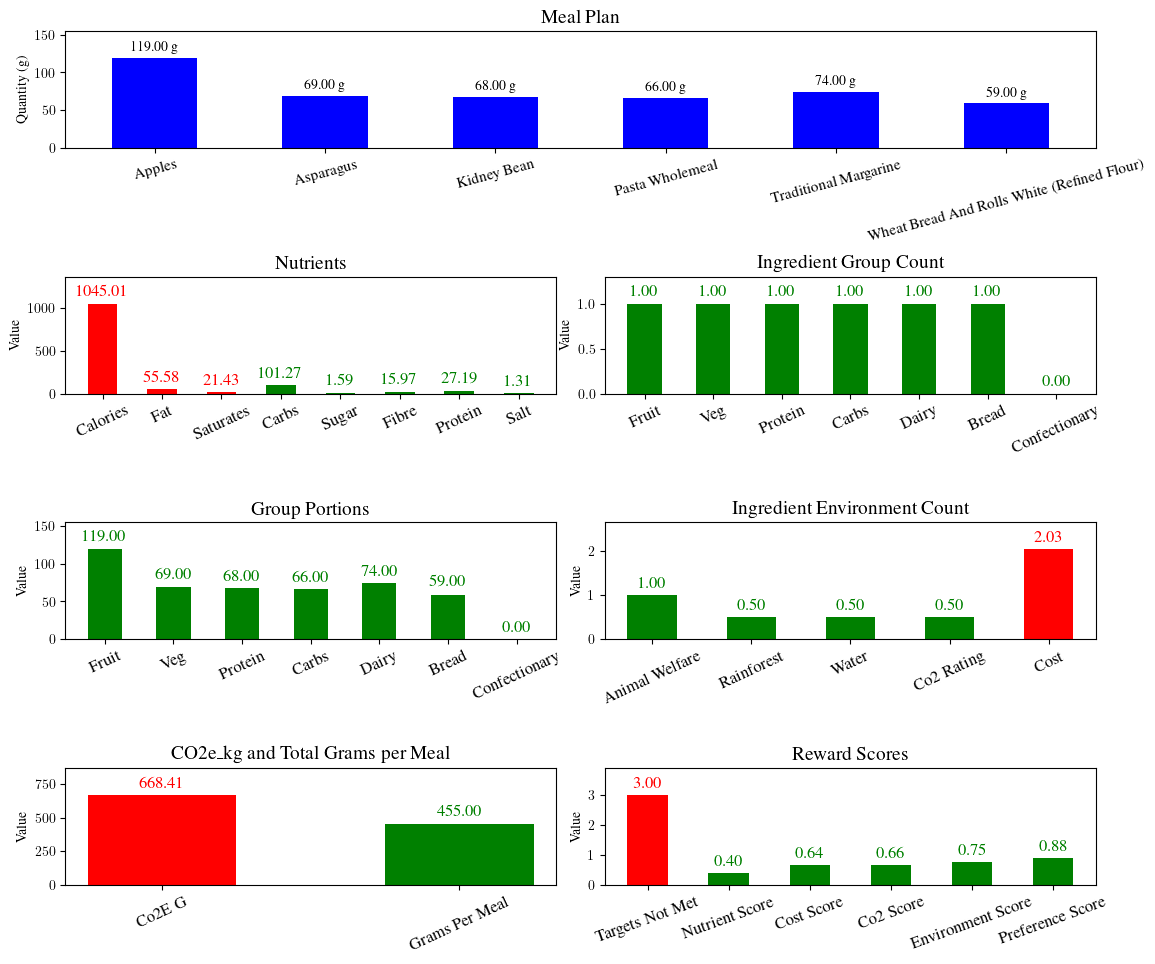

Generated ingredient quantities (simulated_annealing): {'Asparagus': 40.0863607038687, 'Apples': 100.6002241994434, 'Kidney bean': 40.01235731248542, 'Pasta wholemeal': 40.16779230342206, 'Traditional margarine': 50.00891411328706, 'Wheat bread and rolls white (refined flour)': 50.217978415934375} with score 0.8852922660857253


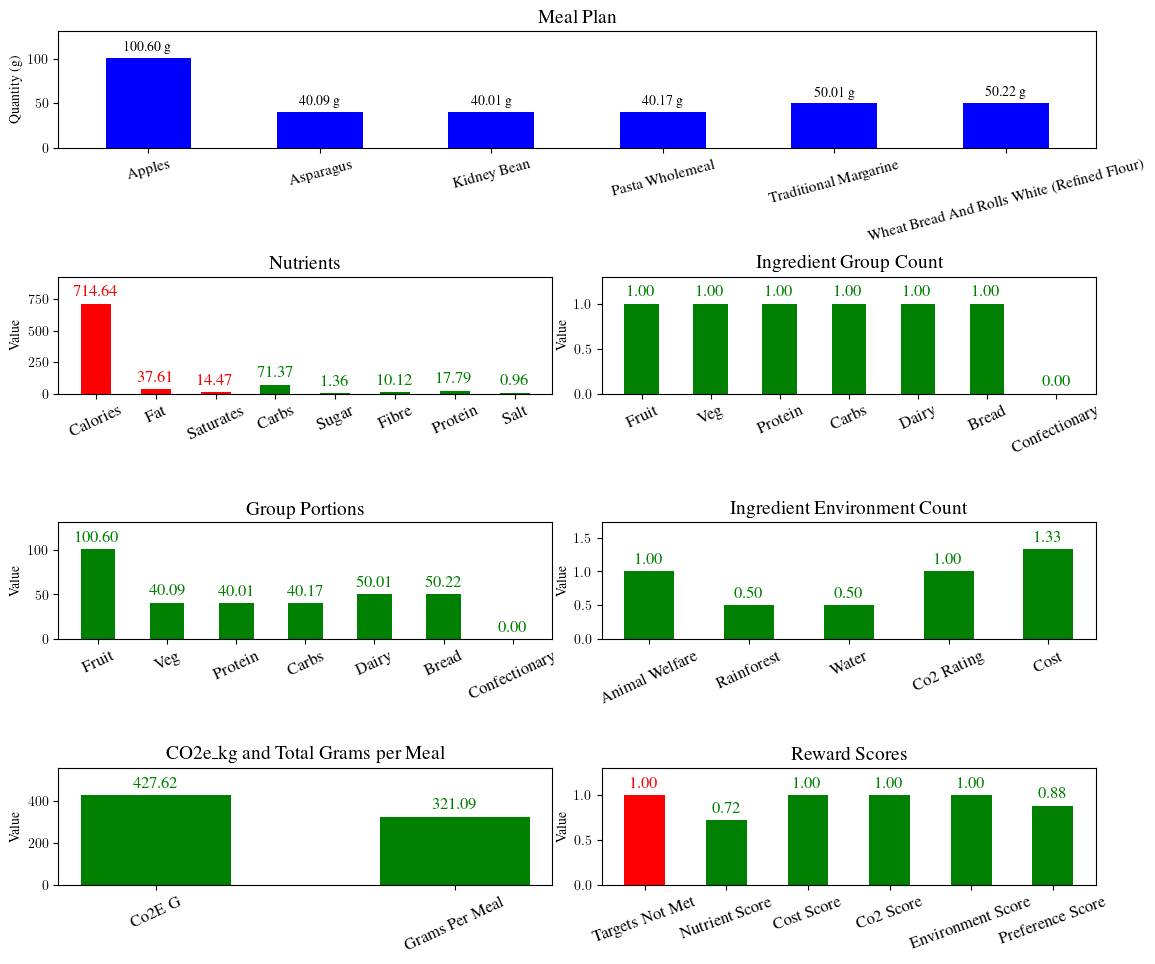

Generated ingredient quantities (genetic_algorithm): {'Asparagus': 40, 'Apples': 107, 'Kidney bean': 43, 'Pasta wholemeal': 40, 'Traditional margarine': 50, 'Wheat bread and rolls white (refined flour)': 51} with score 0.8840893953286993


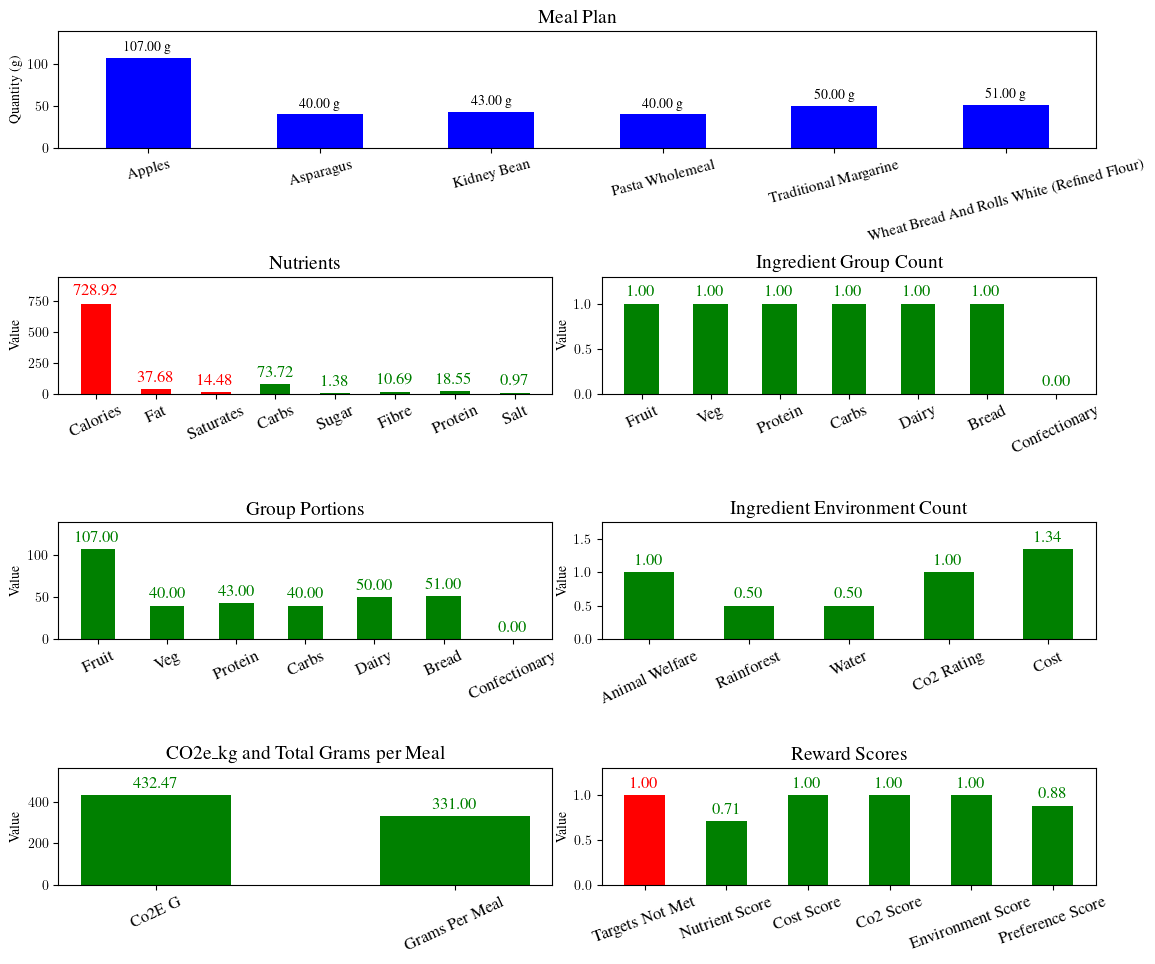

Stopping search: Swarm best objective change less than 1e-08
Generated ingredient quantities (particle_swarm): {'Asparagus': 40.0, 'Apples': 100.00026266622162, 'Kidney bean': 40.0, 'Pasta wholemeal': 40.0, 'Traditional margarine': 50.0, 'Wheat bread and rolls white (refined flour)': 50.0} with score 0.8854454651840507


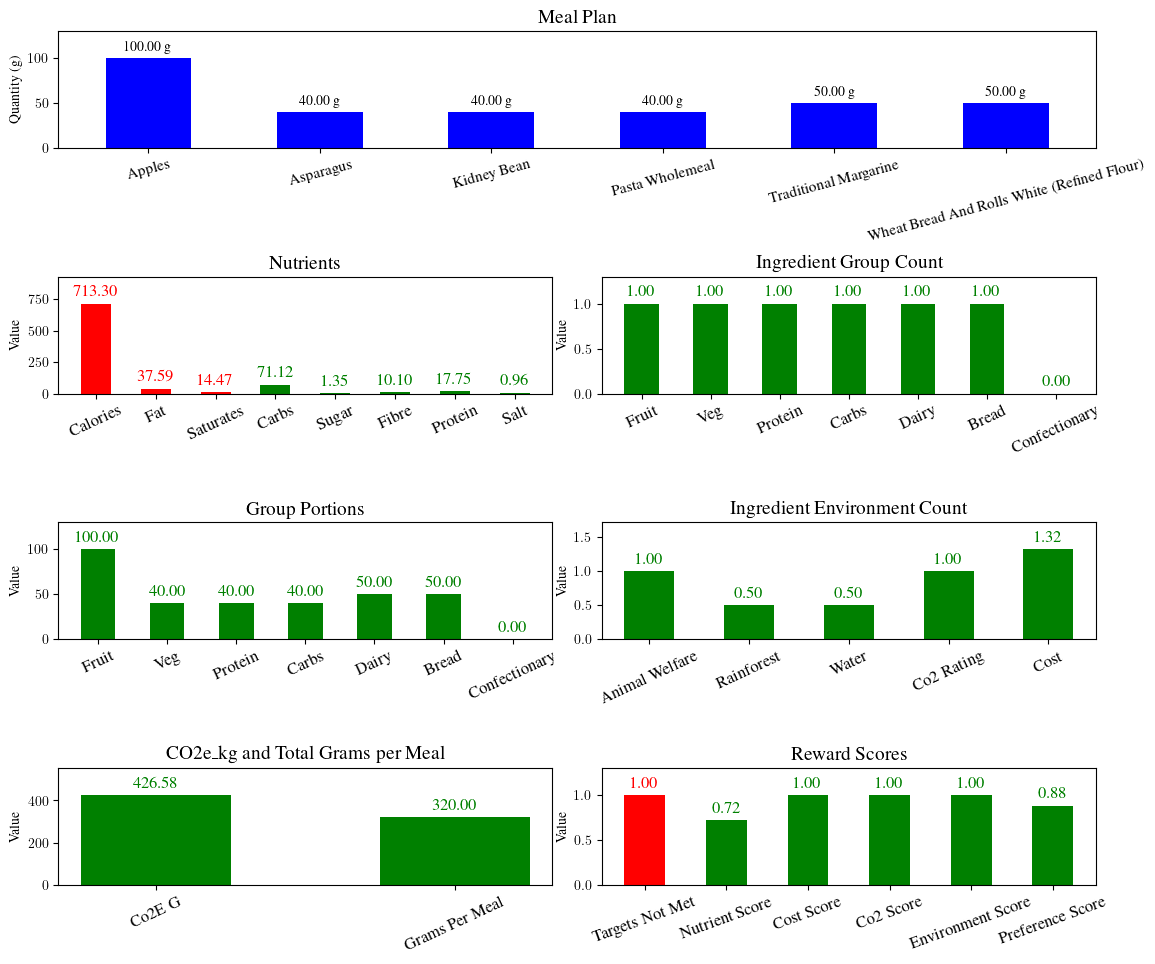

Generated ingredient quantities (bayesian): {'Asparagus': 40, 'Apples': 106, 'Kidney bean': 40, 'Pasta wholemeal': 40, 'Traditional margarine': 50, 'Wheat bread and rolls white (refined flour)': 50} with score 0.885153237358146


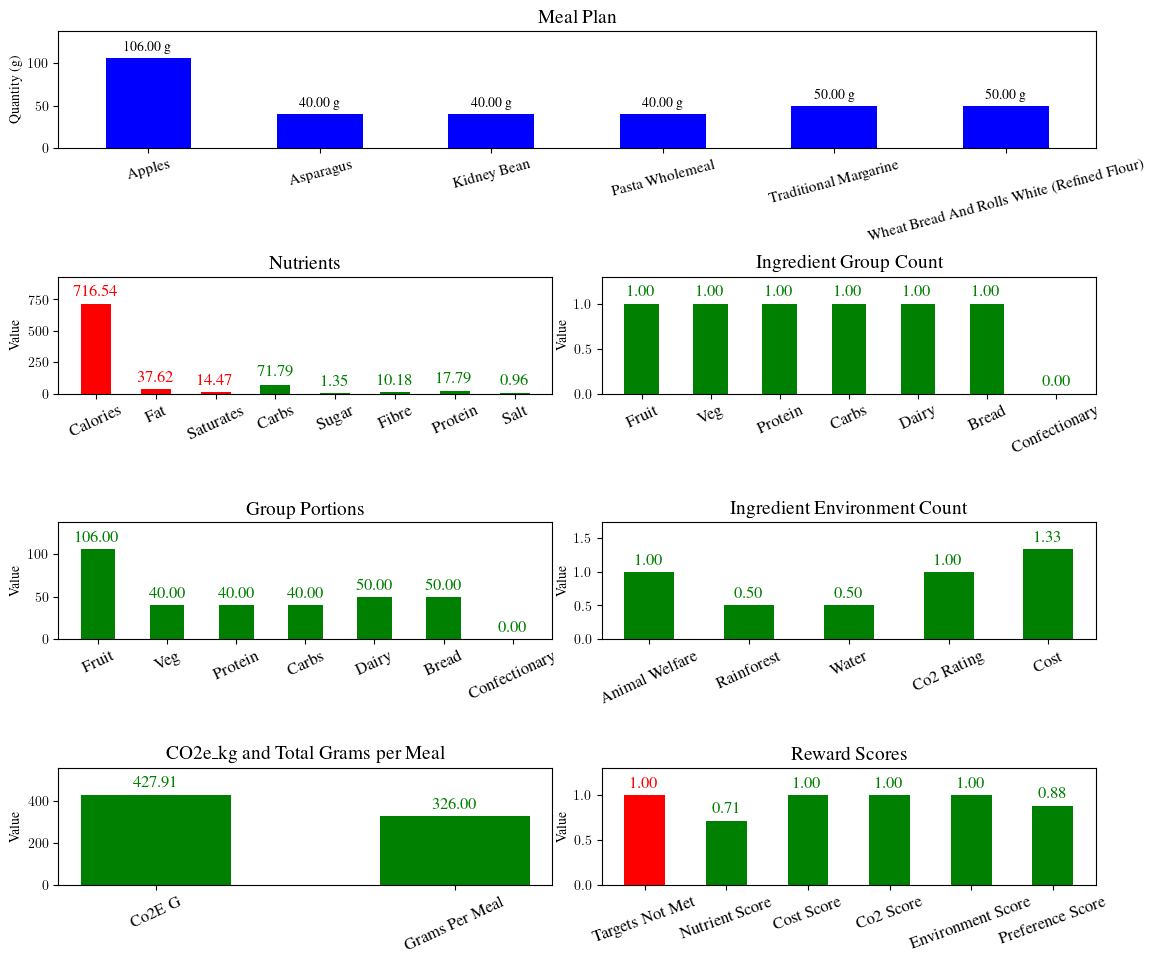

Generated ingredient quantities (hill_climbing): {'Asparagus': 40, 'Apples': 66, 'Kidney bean': 40, 'Pasta wholemeal': 74, 'Traditional margarine': 50, 'Wheat bread and rolls white (refined flour)': 50} with score 0.8791626351387082


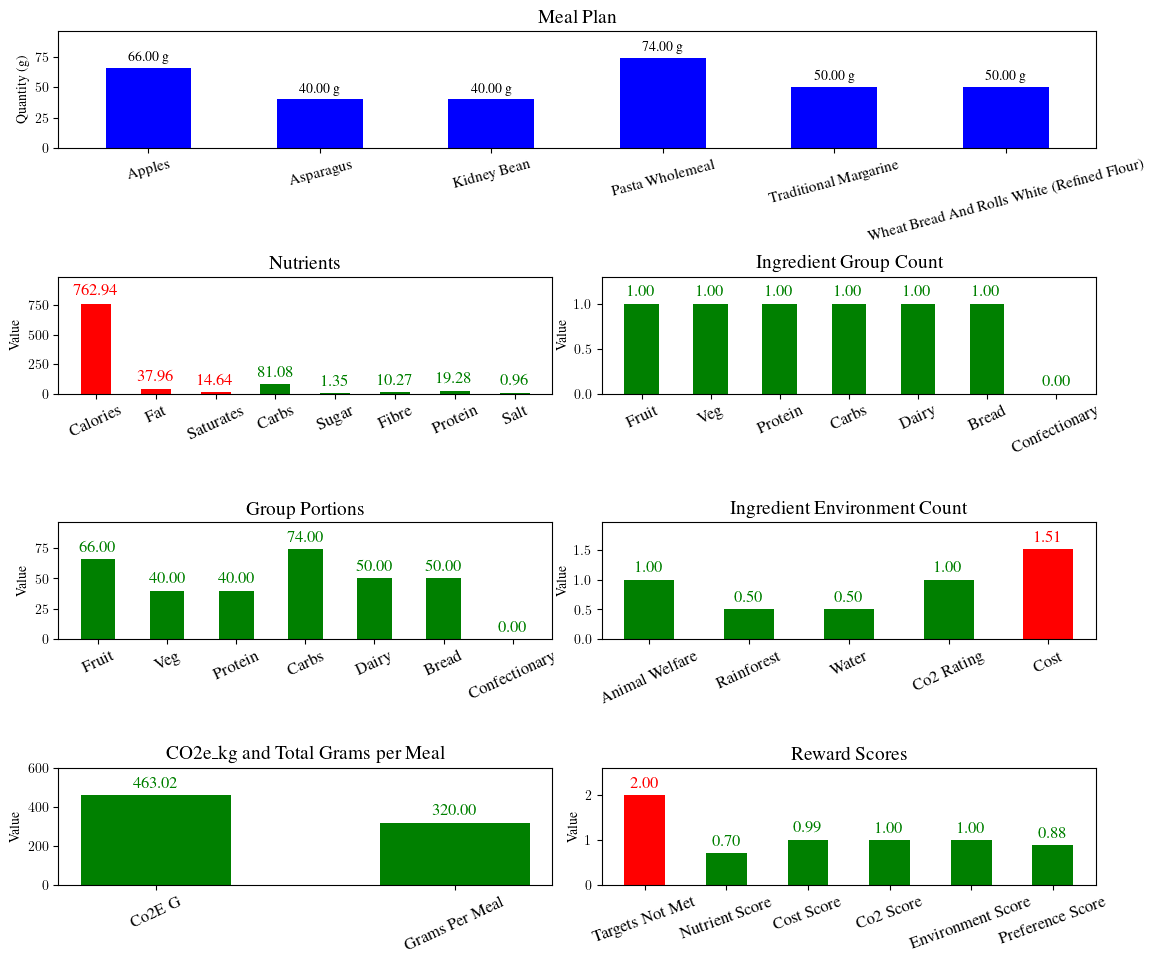

In [5]:


# List of quantity generation methods to test
quantity_types = ["random", "simulated_annealing", "genetic_algorithm", "particle_swarm", "bayesian", "hill_climbing"]

for quantity_type in quantity_types:
    menu_generator_simple = RandomMenuGenerator(
        evaluator,
        menu_plan_length=menu_plan_length,
        weight_type=weight_type,
        probability_best=probability_best,
        seed=seed
    )

    # Generate the menu plan using the specified quantity generation method
    menu_plan_simple, score = menu_generator_simple.generate_menu(
        negotiated_ingredients_simple,
        unavailable_ingredients,
        quantity_type=quantity_type,  # Method to generate quantities
        final_meal_plan_filename='final_meal_plan_simple',
        save_paths={'data': '', 'graphs': ''},
        week=week,  # Week number
        day=day     # Day number
    )


In [ ]:
from models.preferences.random_menu_eval import MenuEvaluator

import logging
import os
import json
import random
from sklearn.metrics import accuracy_score
from models.preferences.preference_utils import (
    get_child_data,
    initialize_child_preference_data,
    print_preference_difference_and_accuracy,
    calculate_percent_of_known_ingredients_to_unknown,
    plot_individual_child_known_percent,
    plot_preference_and_sentiment_accuracies,
    plot_utilities_and_mape,
    plot_utilities_from_json,
)
from utils.process_data import get_data
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generators import RandomMenuGenerator, RLMenuGenerator
from models.preferences.utility_calculator import MenuUtilityCalculator


seed = None
menu_plan_length = 5
weight_type = 'random'
probability_best = 1

# Complex weight function arguments
complex_weight_func_args = {
    'use_normalize_total_voting_weight': False,
    'use_normalize_vote_categories': True,
    'use_compensatory': True,
    'use_feedback': True,
    'use_fairness': True,
    'target_gini': 0.15,
}

# Load data
ingredient_df = get_data("data.csv")
child_feature_data = get_child_data()
true_child_preference_data = initialize_child_preference_data(
child_feature_data, ingredient_df, split=0.35, seed=seed, plot_graphs=False
)

# Initialize menu generators
seed_generator = random.randint(0, int(1e36))

predictor = PreferenceModel(
ingredient_df, child_feature_data, true_child_preference_data, visualize_data=True, file_path='', seed=seed
)

updated_known_and_predicted_preferences, total_true_unknown_preferences, total_predicted_unknown_preferences, label_encoder = predictor.run_pipeline()

label_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}


# Initial negotiation of ingredients
negotiator = IngredientNegotiator(
seed, ingredient_df, updated_known_and_predicted_preferences, complex_weight_func_args, previous_feedback={}, previous_utility={}
)

negotiated_ingredients_simple, negotiated_ingredients_complex, unavailable_ingredients = negotiator.negotiate_ingredients()

# Instantiate the MenuEvaluator
evaluator = MenuEvaluator(ingredient_df, negotiated_ingredients_simple, unavailable_ingredients)

# Instantiate the RandomMenuGenerator with the usual parameters
menu_generator_simple = RandomMenuGenerator(
    evaluator,
    menu_plan_length=menu_plan_length,
    weight_type=weight_type,
    probability_best=probability_best,
    seed=seed
)

# Use the genetic algorithm to both select ingredients and optimize their quantities
optimized_menu, score = menu_generator_simple.genetic_algorithm_select_and_optimize(
    negotiated_ingredients_simple,
    unavailable_ingredients,
    ngen=500,  # Number of generations
    population_size=600,  # Size of the population
    cxpb=0.7,  # Crossover probability
    mutpb=0.3  # Mutation probability
)


print(f"Optimized Menu: {optimized_menu}")
print(f"Score: {score}")

In [7]:
import json
import os

# Define the path to the JSON file
json_file_path = '/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/saved_data/data/run_13/all_results.json'

# Check if the file exists
if os.path.exists(json_file_path):
    # Open and load the JSON file
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)
    
    # Print the loaded data (optional)
    print(data)
else:
    print(f"File not found: {json_file_path}")


[{'0': {'genetic': {'info': {'nutrient_averages': {'calories': 456.6700038909912, 'fat': 3.9599998593330383, 'saturates': 1.2150000557303429, 'carbs': 75.83600234985352, 'sugar': 8.793000340461731, 'fibre': 9.200000077486038, 'protein': 22.381000131368637, 'salt': 0.7571999826468527}, 'ingredient_group_count': {'fruit': 1.0, 'veg': 1.0, 'protein': 1.0, 'carbs': 1.0, 'dairy': 1.0, 'bread': 1.0, 'confectionary': 0.0}, 'ingredient_environment_count': {'animal_welfare': 0.5, 'rainforest': 0.5, 'water': 1, 'CO2_rating': 1}, 'cost': {'cost': 1.3102100118994713}, 'co2e_g': {'co2e_g': 441.9220027923584}, 'reward': {'nutrient_reward': {'calories': 0, 'fat': 0, 'saturates': 0, 'carbs': 0, 'sugar': 0, 'fibre': 0, 'protein': 0, 'salt': 0}, 'ingredient_group_count_reward': {'fruit': 0, 'veg': 0, 'protein': 0, 'carbs': 0, 'dairy': 0, 'bread': 0, 'confectionary': 0}, 'ingredient_environment_count_reward': {'animal_welfare': 0, 'rainforest': 0, 'water': 0, 'CO2_rating': 0}, 'cost_reward': {'cost': 0},

In [18]:
# Define the score metrics
score_metrics = ['nutrient_score', 'cost_score', 'co2_score', 'environment_score', 'preference_score']

# Initialize accumulators for each key in values
key_metric_totals = {}
key_counts = {}

# Loop through the data and accumulate the scores per key
for index in range(len(data)):
    for run, values in data[index].items():
        for key in values.keys():
            if key not in key_metric_totals:
                key_metric_totals[key] = {metric: 0 for metric in score_metrics}
                key_metric_totals[key]['reward'] = 0
                key_metric_totals[key]['time_taken'] = 0
                key_counts[key] = 0

            # Accumulate metrics, reward, and time taken for the current key
            for metric in score_metrics:
                key_metric_totals[key][metric] += values[key]['info']['reward'][metric]
            key_metric_totals[key]['reward'] += values[key]['reward']
            key_metric_totals[key]['time_taken'] += values[key]['time_taken']
            
            # Increment the count for this key
            key_counts[key] += 1

# Calculate averages for each key
key_averages = {}
for key, totals in key_metric_totals.items():
    key_averages[key] = {metric: totals[metric] / key_counts[key] for metric in score_metrics}
    key_averages[key]['reward'] = totals['reward'] / key_counts[key]
    key_averages[key]['time_taken'] = totals['time_taken'] / key_counts[key]

# Print the averages per key
for key, averages in key_averages.items():
    print(f"Average Metrics for key: {key}")
    for metric, average in averages.items():
        if metric != 'time_taken':
            print(f"  {metric}: {average:.2f}")
        else:
            print(f"  {metric}: {average:.2f} seconds")
    print("\n")

Average Metrics for key: genetic
  nutrient_score: 0.88
  cost_score: 0.99
  co2_score: 0.88
  environment_score: 0.95
  preference_score: 0.67
  reward: 0.88
  time_taken: 5.57 seconds


Average Metrics for key: random_random
  nutrient_score: 0.63
  cost_score: 0.54
  co2_score: 0.36
  environment_score: 0.78
  preference_score: 0.49
  reward: 0.57
  time_taken: 0.01 seconds


Average Metrics for key: random_refined
  nutrient_score: 0.84
  cost_score: 0.89
  co2_score: 0.72
  environment_score: 0.90
  preference_score: 0.49
  reward: 0.78
  time_taken: 28.13 seconds


Average Metrics for key: prob_refined
  nutrient_score: 0.91
  cost_score: 0.86
  co2_score: 0.71
  environment_score: 0.88
  preference_score: 0.60
  reward: 0.81
  time_taken: 27.29 seconds


Average Metrics for key: best_refined
  nutrient_score: 0.89
  cost_score: 0.86
  co2_score: 0.58
  environment_score: 0.82
  preference_score: 0.77
  reward: 0.80
  time_taken: 26.93 seconds


Average Metrics for key: RL
  nutr

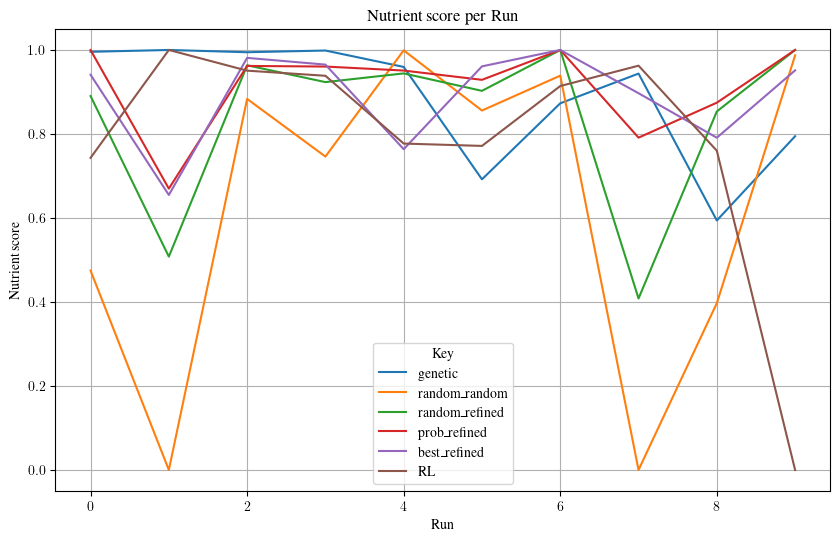

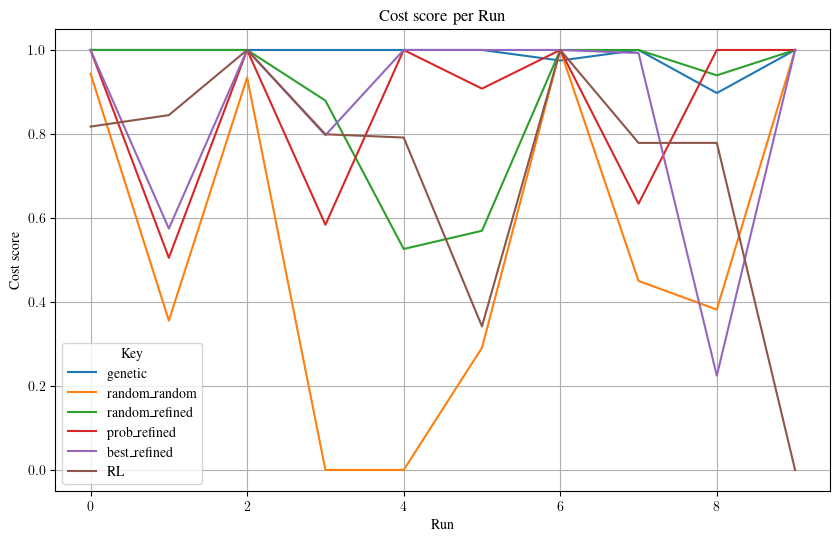

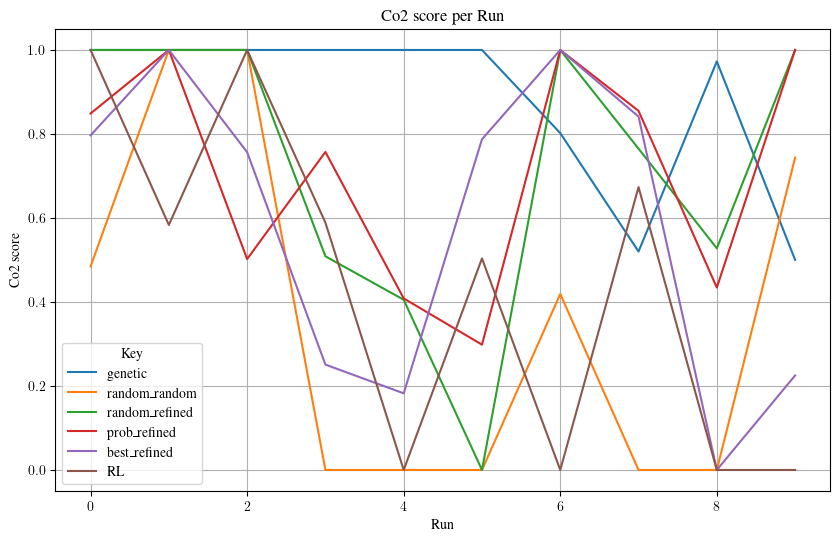

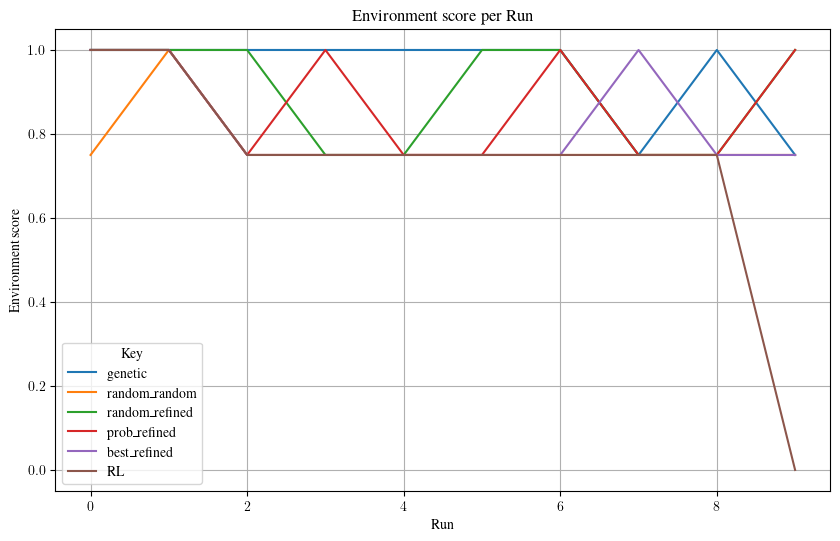

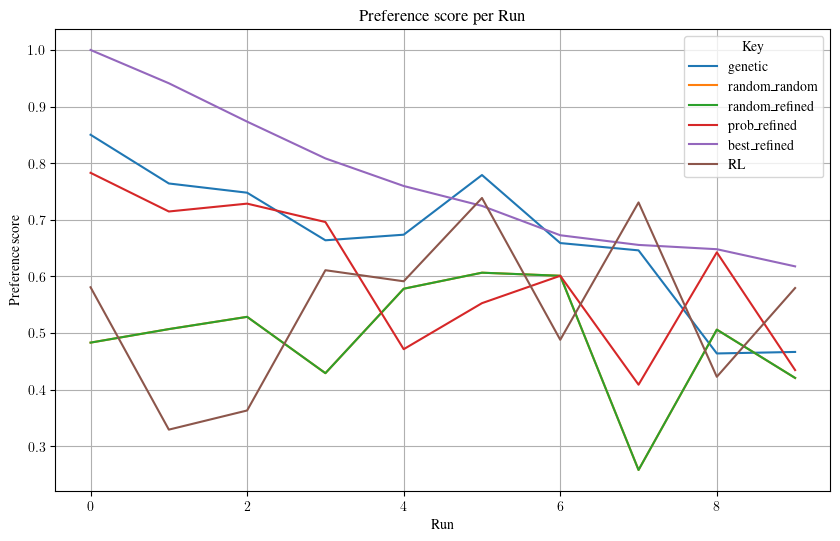

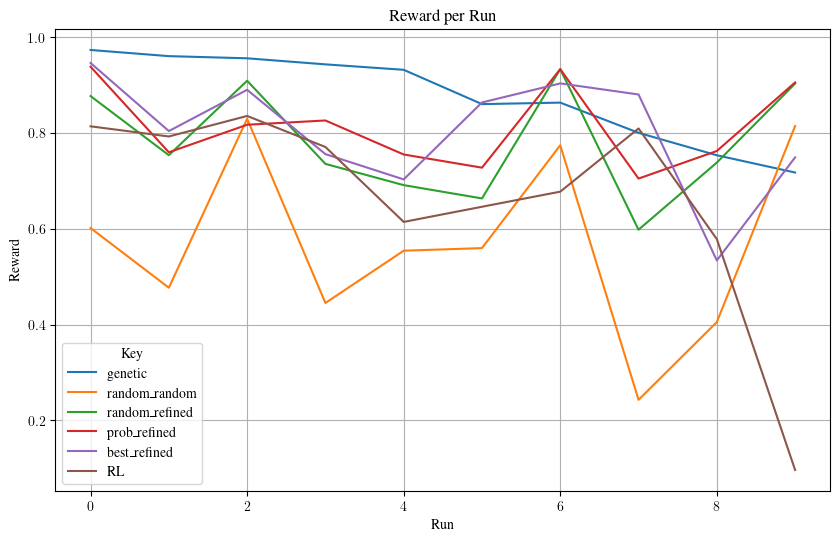

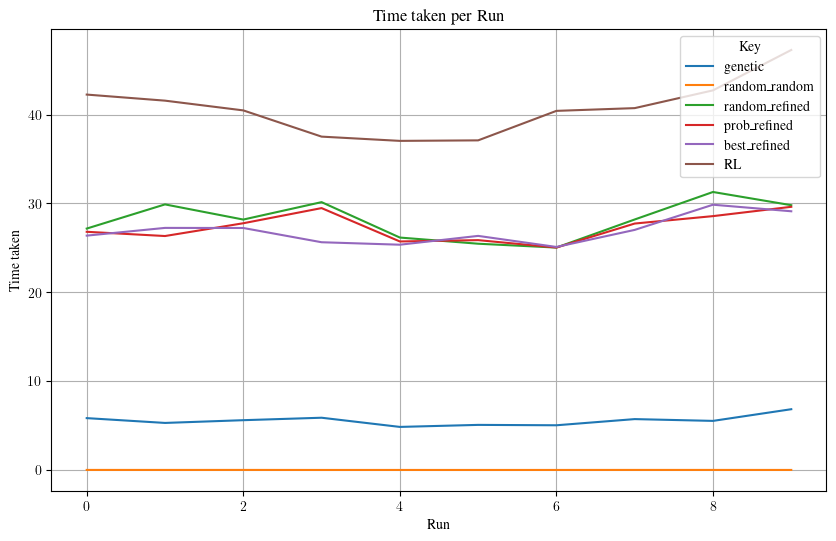

In [20]:
import json
import os
import matplotlib.pyplot as plt
# Define the score metrics and additional metrics
score_metrics = ['nutrient_score', 'cost_score', 'co2_score', 'environment_score', 'preference_score']
additional_metrics = ['reward', 'time_taken']

# Initialize dictionaries to store the data per run for each key
key_run_values = {metric: {} for metric in score_metrics + additional_metrics}

# Loop through the data and collect values per run for each key
for index in range(len(data)):
    for run, values in data[index].items():
        for key in values.keys():
            for metric in score_metrics:
                if key not in key_run_values[metric]:
                    key_run_values[metric][key] = []
                key_run_values[metric][key].append(values[key]['info']['reward'][metric])
            if key not in key_run_values['reward']:
                key_run_values['reward'][key] = []
            key_run_values['reward'][key].append(values[key]['reward'])
            if key not in key_run_values['time_taken']:
                key_run_values['time_taken'][key] = []
            key_run_values['time_taken'][key].append(values[key]['time_taken'])

# Plotting the results for each metric
for metric in score_metrics + additional_metrics:
    plt.figure(figsize=(10, 6))
    for key, run_values in key_run_values[metric].items():
        plt.plot(run_values, label=key)
    
    plt.title(f'{metric.replace("_", " ").capitalize()} per Run')
    plt.xlabel('Run')
    plt.ylabel(metric.replace('_', ' ').capitalize())
    plt.legend(title='Key')
    plt.grid(True)
    plt.show()

In [ ]:
for  in data:
    

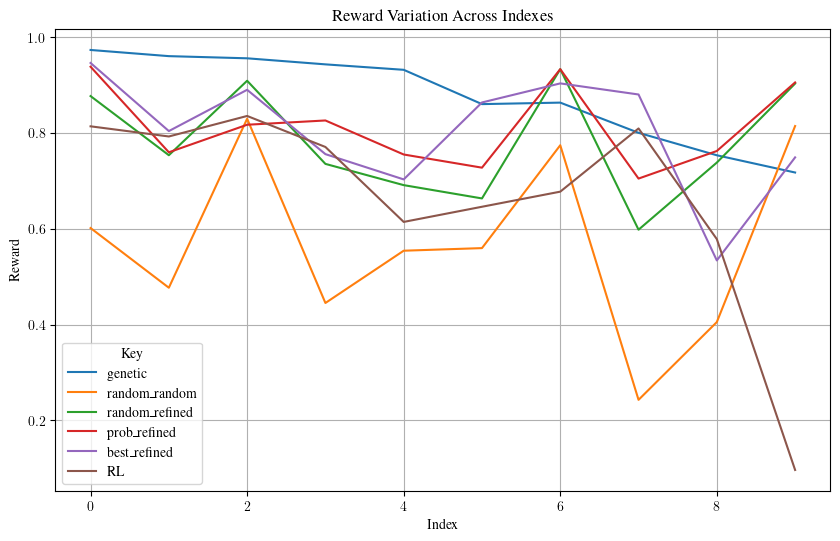

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metric to plot
metric_to_plot = 'reward'  # We are plotting the 'reward'

# Initialize a dictionary to store the data per index for each key
key_index_values = {}

# Loop through the data and collect values per index for each key
for index in range(len(data)):
    for run, values in data[index].items():
        for key in values.keys():
            if key not in key_index_values:
                key_index_values[key] = []
            key_index_values[key].append(values[key][metric_to_plot])

# Plotting the results for the reward metric
plt.figure(figsize=(10, 6))

for key, index_values in key_index_values.items():
    # Convert list of lists to a numpy array
    index_values = np.array(index_values)

    # Transpose if needed to match the shape (indexes, runs)
    if index_values.ndim == 1:
        index_values = np.expand_dims(index_values, axis=1)

    # Calculate the mean and standard deviation across runs for each index
    mean_values = np.mean(index_values, axis=1)
    std_values = np.std(index_values, axis=1)

    # Plot the mean line for each key
    plt.plot(range(index_values.shape[0]), mean_values, label=key)

    # Shade the area between mean - std and mean + std
    plt.fill_between(range(index_values.shape[0]),
                     mean_values - std_values,
                     mean_values + std_values,
                     alpha=0.2)

plt.title(f'{metric_to_plot.capitalize()} Variation Across Indexes')
plt.xlabel('Index')
plt.ylabel(metric_to_plot.capitalize())
plt.legend(title='Key')
plt.grid(True)
plt.show()
